In [1]:
%matplotlib notebook
import datetime as datetime
import pandas as pd
import numpy as np
import seaborn 
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

#import pandas_datareader.data as web
#import quandl 
#quandl.ApiConfig.api_key = 'DeZUeasSpK9QqNz3UMkk'

In [2]:
portfolioCSVPath = '/Users/marke/Google Drive/myPapers/myPortfolio.csv'
#portfolioCSVPath = '/Users/marke/Google Drive/myPapers/cathyPortfolio.csv'
cryptoCSVPath = '/Users/marke/Google Drive/myPapers/crypto.csv'

## Funds

In [3]:
dfPortfolio = pd.read_csv(portfolioCSVPath,header=None)
dfPortfolio

,0,1,2
0,Fidelity 500 Index IPR (U OF TEXAS TSA),FXAIX,1.072
1,Vanguard 500 Index Fund Admiral Shares (U OF T...,VFIAX,323.221
2,Fidelity 500 Index IPR (UTSAVER),FXAIX,1.142
3,Vanguard 500 Index Fund Admiral Shares (UTSAVER),VFIAX,344.111
4,iShares Barclays TIPS Bond Fund (ETF)(ROLLOVER...,TIP,630.000
5,SPDR Gold Trust (ETF)(ROLLOVER IRA),GLD,390.000
6,Fidelity 500 Index Fund Premium Class(ROLLOVER...,FUSVX,1089.679
7,Fidelity Government Cash Reserves(ROLLOVER IRA),FDRXX,126375.570
8,Vanguard Precious Metals And Mining Fund Inves...,VGPMX,3052.887
9,SSGA S&P 500 Index Fund - Class N (Spoken reti...,SVSPX,261.435


In [4]:
def df2Value(dfPortfolio):
    ts = TimeSeries(key='7AS7YUCGDVZUSODF', output_format='pandas')
    
    dfDict = {}
    dfDict['CASH'] = (1.0,0,'various cash...')
    
    for desc,symbol, shares in dfPortfolio.values:
        print "getting: " + symbol
        if symbol != 'FDRXX' and symbol !='CORE':
            #dfDict[symbol] = (web.DataReader(symbol, "google", start, end), shares,desc)
            #dfDict[symbol] = quandl.get("WIKI/%s" % symbol, start_date=start, end_date=end)
            
            data, meta_data = ts.get_daily(symbol=symbol,outputsize='compact')
            dfDict[desc] = (data,shares,desc)
            
        else:
            dfDict['CASH'] = (1.0, dfDict['CASH'][1] + shares,'various cash...')
    print "finished..."
    return dfDict 

In [5]:
result0 = df2Value(dfPortfolio)

getting: FXAIX
getting: VFIAX
getting: FXAIX
getting: VFIAX
getting: TIP
getting: GLD
getting: FUSVX
getting: FDRXX
getting: VGPMX
getting: SVSPX
finished...


In [6]:
portfolioValueTimeSeries = np.sum(np.array([triple[0]['close'].values * triple[1] 
                                            for key,triple in result0.items() if key !='CASH']),
                                  axis=0) + result0['CASH'][1]

<IPython.core.display.Javascript object>


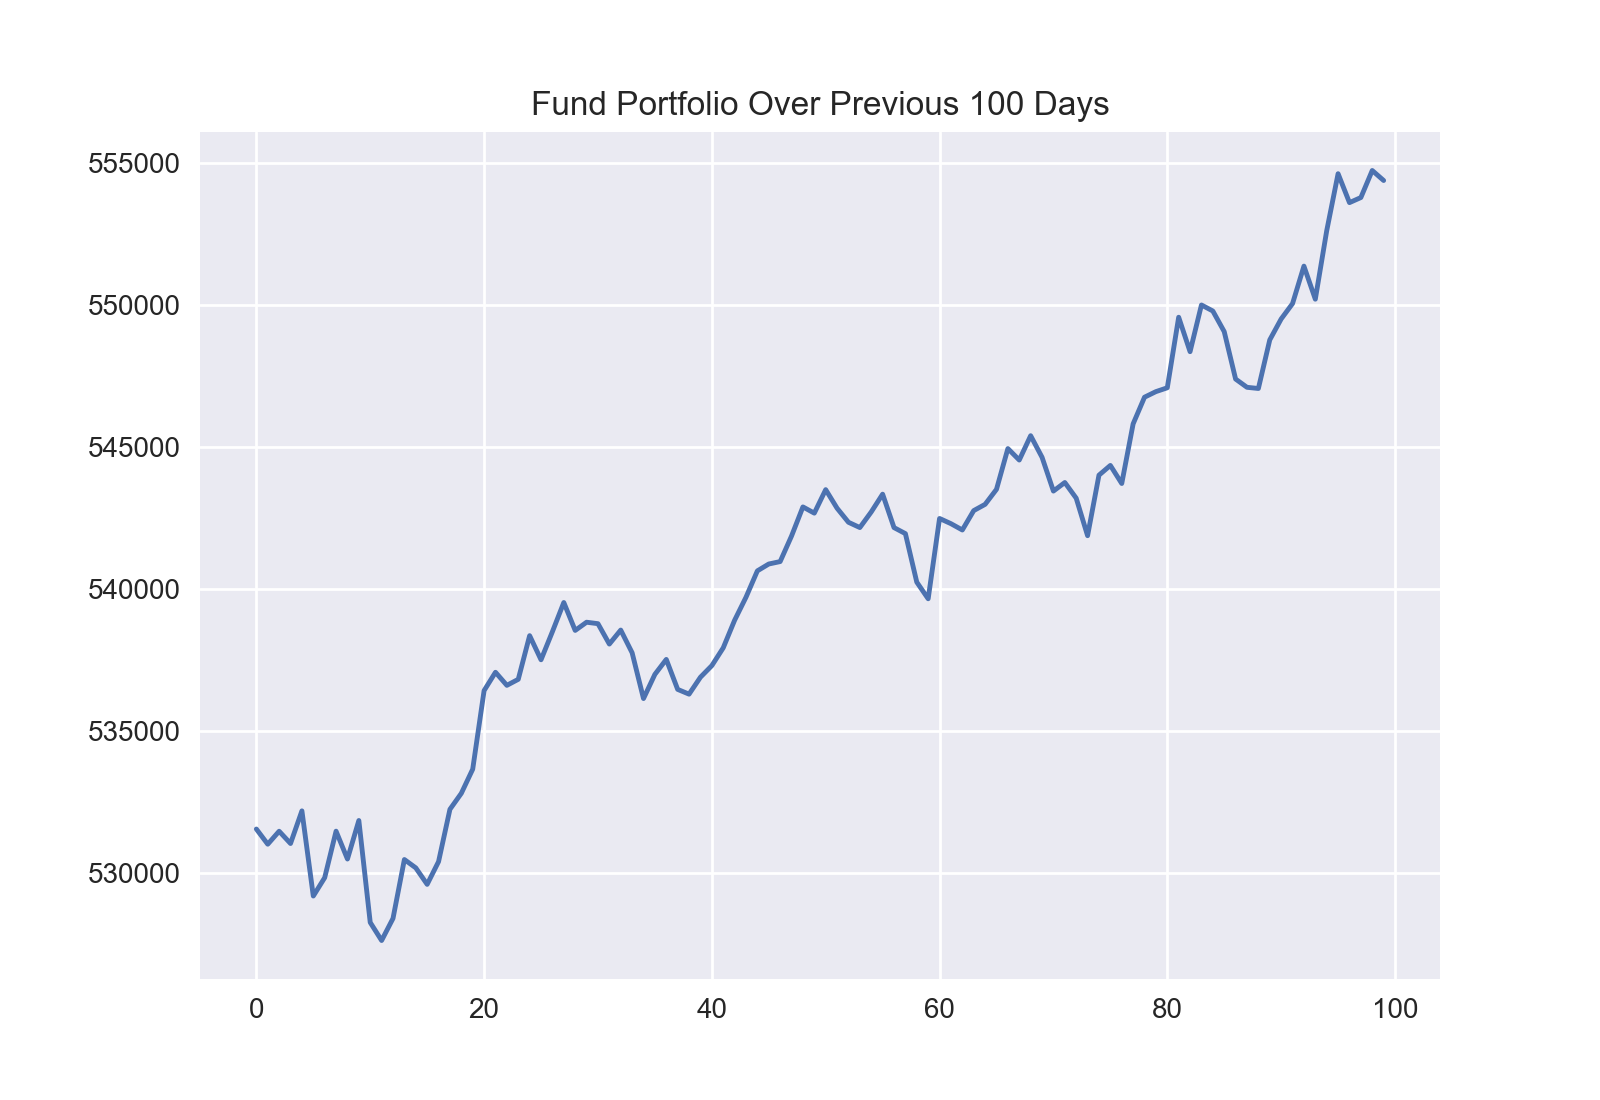

In [7]:
plt.figure()
plt.plot(portfolioValueTimeSeries)
plt.title("Fund Portfolio Over Previous 100 Days");

In [8]:
print "stock portfolio: "+ str(portfolioValueTimeSeries[-1])

stock portfolio: 554367.65791


## Crypto

In [9]:
dfCrypto = pd.read_csv(cryptoCSVPath,header=None)
dfCrypto

,0,1,2
0,Jaxx BTC,BTC,0.059684
1,Jaxx ETH,ETH,3.280443
2,Jaxx BCH,BCH,0.000970
3,Trezor BTC,BTC,0.285425
4,Trezor ZEC,ZEC,7.991800
5,Trezor ETH,ETH,39.318110
6,Trezor ETC,ETC,238.206112
7,Trezor BCH,BCH,0.344330
8,Daedalus,ADA,1501.496000


In [10]:
def dfCrypto2Value(dfCrypto):
    
    cc = CryptoCurrencies(key='7AS7YUCGDVZUSODF', output_format='pandas')
    dfDict = {}
    for desc,symbol, shares in dfCrypto.values:
        print "getting: " + symbol
        #data, meta_data = cc.get_digital_currency_daily(symbol='ETH', market='USD')
        try:
            data, meta_data = cc.get_digital_currency_intraday(symbol=symbol, market='USD')
            dfDict[desc] = (data,shares,desc)
        except:
            "ERROR: " + desc
    print "finished..."
    return dfDict 

In [11]:
result = dfCrypto2Value(dfCrypto)

getting: BTC
getting: ETH
getting: BCH
getting: BTC
getting: ZEC
getting: ETH
getting: ETC
getting: BCH
getting: ADA
finished...


In [12]:
cryptoValueTimeSeries = np.sum(np.array([(triple[0]['. price (USD)'].values[:,0] * triple[1])[-12*48:] for key,triple in result.items()]),axis=0)

<IPython.core.display.Javascript object>


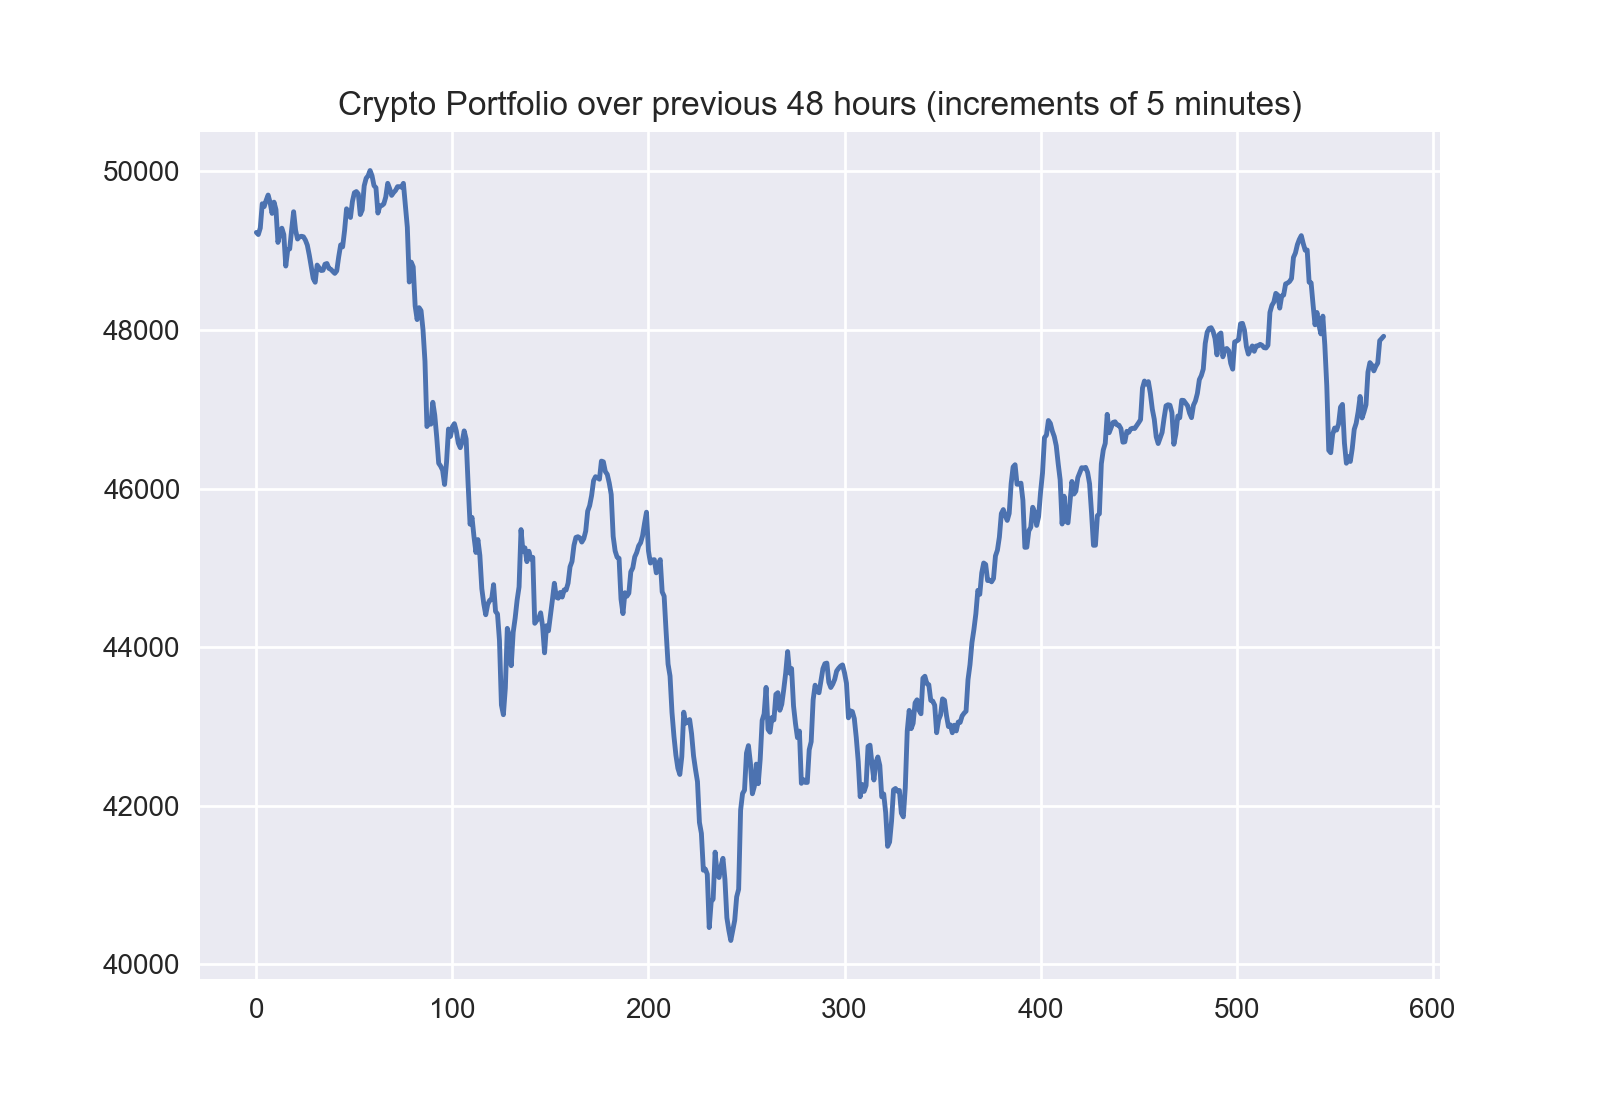

In [13]:
plt.figure()
plt.plot(cryptoValueTimeSeries)
plt.title('Crypto Portfolio over previous 48 hours (increments of 5 minutes)');

In [14]:
print "crypto portfolio:  " + str(cryptoValueTimeSeries[-1])

crypto portfolio:  47920.8313031


In [15]:
print "total: " + str(cryptoValueTimeSeries[-1] + portfolioValueTimeSeries[-1])

total: 602288.489213
